# Trabalho 1 - Apredendizado de Máquina

## 1 - Regressão Linear com uma Variável

### 1.1 Visualização dos Dados

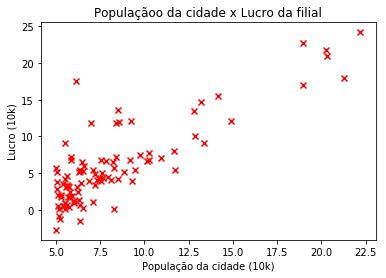

In [10]:
# Código para exibir o gráfico após execução do bloco
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


dataset = pd.read_csv('ex1data1.txt', header = None)

x = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1:].values

plt.scatter(x, y, color='red', marker='x')
plt.title('Populaçãoo da cidade x Lucro da filial')
plt.xlabel('População da cidade (10k)')
plt.ylabel('Lucro (10k)')
plt.show()

### 1.2 Gradiente Descendente

In [11]:
def custo_reglin_uni(X, y, theta):

    # Quantidade de exemplos de treinamento
    m = len(y)

    # Computar a função do custo J
    J = (np.sum((X.dot(theta) - y)**2)) / (2 * m)

    return J

def gd_reglin_uni(X, y, alpha, epochs, theta = np.array([0,0], ndmin = 2).T):

    """
    m recebe o número de observações do target array para aplicar
    posteriormente na função de erro do gradiente descendente
    """
    m = len(y)

    """
    Inicialização de um array do tamanho da quantidade de execuções
    do gradiente passados para a função
    """
    cost = np.zeros(epochs)
    
    for i in range(epochs):
        """
        A cada iteração a feature matrix X é multiplicada pelo theta, que é iniciado
        com valores [0,0] e vai "caminhando" até encontrar o menor valor de erro
        global.
        Como é uma regressão linear de uma variável, aplicamos o algoritmo do
        gradiente descendente para theta1, que está dividido em partes abaixo
        Para cada iteração e atualização do theta, é registrado no vetor cost qual
        o retorno do calculo da função de custo (Mean Square Error). A última execução
        registra o menor custo e o theta utilizado para atingi-lo, retornando esses
        valores.
        """
        
        # htheta * x(i)
        h = X.dot(theta)
        
        # h - y(i)
        loss = h - y

        # 1/m * (x(i) * loss)
        gradient = X.T.dot(loss) / m

        # theta = theta - (learning rate * gradient)
        theta = theta - (alpha * gradient)

        cost[i] = custo_reglin_uni(X, y, theta = theta)

    return cost[-1], theta

x_ones = np.c_[np.ones((x.shape[0],1)), x]

# Conforme solicitado no enunciado para iniciar todos os parâmetros com zero
print(custo_reglin_uni(x_ones, y, theta = np.array([0,0], ndmin=2).T))

# Conforme solicitação no texto do trabalho inicie o valor da taxa de aprendizagem com 0.01
custo, theta = gd_reglin_uni(x_ones, y, 0.01, 5000)
print(custo)

32.072733877455676
4.476971396982804


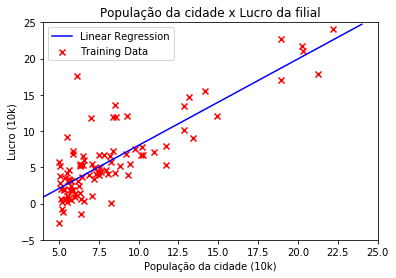

In [12]:
def visualizar_reta(X, y):
    t = np.arange(0, 25, 1)
    plt.scatter(X, y, color='red', marker='x', label='Training Data')
    plt.plot(t, theta[0] + (theta[1]*t), color='blue', label='Linear Regression')
    plt.axis([4, 25, -5, 25])
    plt.title('População da cidade x Lucro da filial')
    plt.xlabel('População da cidade (10k)')
    plt.ylabel('Lucro (10k)')
    plt.legend()
    plt.show()
    
visualizar_reta(x, y)


In [13]:
# Predição para 35.000 habitantes
print(np.array([1, 3.5]).dot(theta))

# Predição para 70.000 habitantes
print(np.array([1, 7]).dot(theta))

[0.28014834]
[4.45559719]


### 1.3 Visualização de J(θ)

<Figure size 432x288 with 0 Axes>

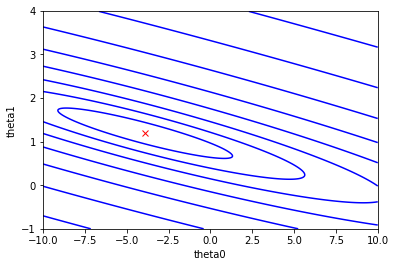

In [14]:
def visualizar_j_countour(x, y):
    
    # Valores de theta0 e theta1 informados no enunciado do trabalho
    theta0 = np.arange(-10, 10, 0.01)
    theta1 = np.arange(-1, 4, 0.01)

    # Inicia os valores de J com zeros
    J = np.zeros((len(theta0), len(theta1)))

    # Preenche os valores sucessivos de J
    for i in range(len(theta0)):
        for j in range(len(theta1)):
            t = [[theta0[i]], [theta1[j]]]
            J[i,j] = custo_reglin_uni(x, y, t)

    # Transpõe J devido as funções contour/meshgrid
    J = np.transpose(J)

    # Plota a função de custo utilizando levels como logspace. Range -1 ~ 4 devido ao
    # range de theta1 e 20 pois o theta0 tem 20 valores (-10 até 10)
    fig = plt.figure()
    fig, ax = plt.subplots()
    ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20), colors='blue')
    ax.plot(theta[0,0], theta[1,0], 'rx')
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.show()
    
visualizar_j_countour(x_ones, y)

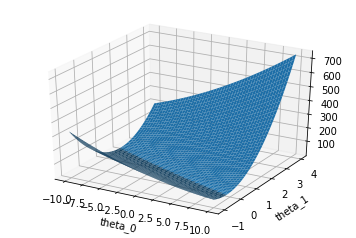

In [15]:
def visualizar_j_surface(x, y):
    # Valores de theta0 e theta1 informados no enunciado do trabalho
    theta0 = np.arange(-10, 10, 0.01)
    theta1 = np.arange(-1, 4, 0.01)
    
    # Inicia os valores de J com zeros
    J = np.zeros((len(theta0), len(theta1)))

    # Preenche os valores sucessivos de J
    for i in range(len(theta0)):
        for j in range(len(theta1)):
            t = [[theta0[i]], [theta1[j]]]
            J[i,j] = custo_reglin_uni(x, y, t)

    # Transpõe J devido as funções contour/meshgrid
    J = np.transpose(J)

    # Comandos necessários para o matplotlib plotar em 3D
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plotando o gráfico de superfície
    theta0, theta1 = np.meshgrid(theta0, theta1) 
    surf = ax.plot_surface(theta0, theta1, J)
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.show()
    
visualizar_j_surface(x_ones, y)

## 2 - Regressão Linear com Múltiplas Variáveis

### 2.1 Normalização de características

> A implementação da função `normalizar_caracteristica` deve funcionar com conjuntos de dados de variados tamanhos (i.e., com qualquer quantidade de características e/ou exemplos)

A afirmação é verdadeira pois a função recebe uma matriz de features X e faz os cálculos da média, desvio padrão e da normalização em si para a matriz inteira, e não feature a feature. A implementação ser dessa maneira é necessária para que possa ser generalizada para qualquer número *n* de features que uma regressão linear multivariável possa ter. O mesmo se aplica para a quantidade de registros da matriz.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normalizar_caracteristicas(X, y):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X_norm = (X - mean_X) / std_X
    
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    y_norm = (y - mean_y) / std_y
    
    # Armazenando os valores utilizados para a normalização para referência futura
    norm_values = {"mean_X": mean_X,
                   "std_X": std_X,
                   "mean_y": mean_y,
                   "std_y": std_y}
    
    return X_norm, y_norm, mean_X, std_X, mean_y, std_y, norm_values

dataset = pd.read_csv('ex1data2.txt', header=None)

x = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1:].values

x_norm, y_norm, mean_x, std_x, mean_y, std_y, norm_values_dict = normalizar_caracteristicas(x, y)
print("x_norm: " + "\n" + str(x_norm) + "\n",
      "y_norm: " + "\n" + str(y_norm) + "\n",
      "mean_x: " + str(mean_x) + "\n",
      "std_x: " + str(std_x) + "\n",
      "mean_y: " + str(mean_y) + "\n",
      "std_y: " + str(std_y))


x_norm: 
[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.535213

### 2.2 Gradiente descendente

In [75]:
def custo_reglin_multi(X, y, theta):
    
    # Quantidade de exemplos
    m = len(y)

    # Computa a função de custo J
    J = (np.sum((X.dot(theta) - y)**2))/ (2 * m)

    return J


def gd_reglin_multi(X, y, alpha, epochs, theta):
    
    m = len(y)

    cost = np.zeros(epochs)

    for i in range(epochs):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta = theta - (alpha * gradient)
        cost[i] = custo_reglin_multi(X, y, theta=theta)

    return cost[-1], theta


x_norm_ones = np.c_[np.ones((x_norm.shape[0],1)), x]

print(custo_reglin_multi(x_norm_ones, y_norm, theta = np.array([0,0,0], ndmin=2).T))
custo, theta = gd_reglin_multi(x_norm_ones, y_norm, 0.01, 20, theta = np.array([0,0,0], ndmin=2).T)
print(custo)

0.5
1.89553293438609e+185


> Repare que o código fornecido (1) dá suporte a qualquer número de características e (2) está vetorizado. Explique em seu relatório de que forma esse código implementa essas duas funcionalidades

O suporte a múltiplas características se dá através da passagem das features para as funções de custo e gradiente como uma matriz, e não como features separadas. À matriz de features X é acrescentado um X0 = 1 que nos permite "generalizar" a fórmula do gradiente descendente para todas as features sem que o resultado seja alterado.
A vetorização acontece ao passarmos para as funções o vetor de hipóteses transpoto e multiplicá-lo pela nossa matriz de features.


# T1 - Parte 3

## 3 - Regressão Logística

### 3.1 - Visualização dos dados

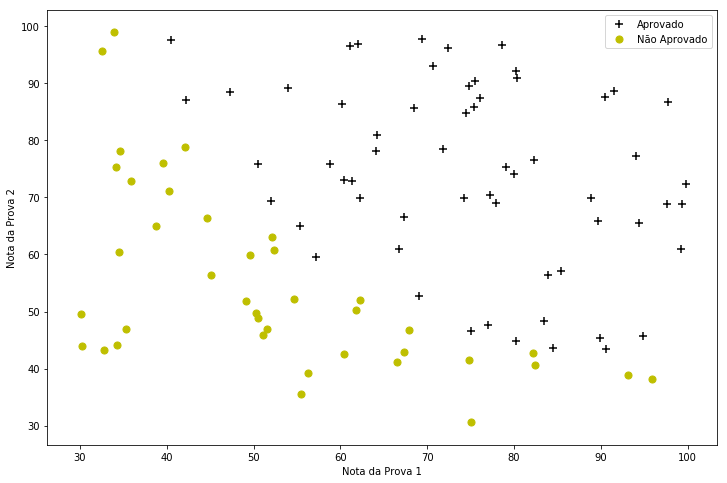

In [3]:
# Código para exibir o gráfico após execução do bloco
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Carregando os dados do dataset e armazendo em um array.
# Em seguida damos uma rápida visualizada nos dados
data = pd.read_csv('ex2data1.txt', header=None,
                   names=['Prova 1', 'Prova 2', 'Aprovado'])
data.head()

# A primeira coluna, preenchida com 1's, represenhta o theta0
data.insert(0, 'Ones', 1)

# converte de dataframes para arrays
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

# converte de arrays para matrizes
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

# gerando o gráfico de dispersão para análise preliminar dos dados

positivo = data[data['Aprovado'].isin([1])]
negativo = data[data['Aprovado'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(positivo['Prova 1'], positivo['Prova 2'],
           s=50, c='k', marker='+', label='Aprovado')

ax.scatter(negativo['Prova 1'], negativo['Prova 2'],
           s=50, c='y', marker='o', label='Não Aprovado')
ax.legend()
ax.set_xlabel('Nota da Prova 1')
ax.set_ylabel('Nota da Prova 2')
plt.show()

### 3.2 - Implementação

#### 3.2.1 - Função sigmoide

In [4]:
def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

#Testando para 0
print(sigmoide(0))

#Testando para 1000
print(sigmoide(749))

#Testando para -1000
print(sigmoide(-749))

# Testando para vetor
print(sigmoide(np.array([0, 2])))

0.5
1.0
0.0
[0.5        0.88079708]


c:\users\aiqui\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


#### 3.2.2 - Função de custo e gradiente

In [5]:
def normalizar_caracteristicas(X, y):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X_norm = (X - mean_X) / std_X

    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    y_norm = (y - mean_y) / std_y

    return X_norm, y_norm, mean_X, std_X, mean_y, std_y


def custo_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    return np.sum(grad0 - grad1) / (len(X))


X = data.iloc[:, 1:cols - 1]
y = data.iloc[:, cols - 1:cols]

X = np.array(X.values)
y = np.array(y.values)

(examData_norm, labels_norm, mean_examData,
 std_examData, mean_labels, std_labels) = normalizar_caracteristicas(X, y)

examData_norm = np.c_[np.ones((X.shape[0], 1)), examData_norm]

theta = np.array([0, 0, 0], ndmin=2)

# Chamando essa função com examData_norm trnaposto dá erro de dimensionalidade.
# Nas chamadas a essa função na main.py enviada pelo professor ele não passa
# a matriz X como transposta
J = custo_reglog(theta, examData_norm, labels_norm)

print(J)

0.6931471805599453


#### 3.2.3 - Aprendizado de parâmetros

In [6]:
import scipy.optimize as opt
import numpy as np
import pandas as pd

def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

def custo_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    return np.sum(grad0 - grad1) / (len(X))

def gd_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:, i])
        grad[i] = np.sum(term) / len(X)

    return grad

data = pd.read_csv('ex2data1.txt', header=None,
                   names=['Prova 1', 'Prova 2', 'Aprovado'])

# A primeira coluna, preenchida com 1's, represenhta o theta0
data.insert(0, 'Ones', 1)

# converte de dataframes para arrays
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

# converte de arrays para matrizes
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

result = opt.fmin_tnc(func=custo_reglog,
                      x0=theta,
                      fprime=gd_reglog,
                      args=(X, y))
custo_reglog(result[0], X, y)

0.20349770158947425

#### 3.2.4 - Avaliação do modelo

In [10]:
def predizer(theta, X):
    probabilidade = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]

def acuracia(X, theta, result):
    theta_min = np.matrix(result[0])
    predicoes = predizer(theta_min, X)
    corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]
    acc = (sum(map(int, corretas)) % len(corretas))
    print('Accurácia {0}%'.format(acc))
    
x1 = np.array([[1.0, 45.0, 85.0]])
theta_min = np.matrix(result[0])
p = predizer(theta_min, x1)

probabilidade = sigmoide(x1 * theta_min.T)
print("Probabilidade: ", probabilidade[0, 0])

acuracia(X, x1, result)

Probabilidade:  0.776290625526598
Accurácia 89%


# T1 - Parte 4

## 4 - Regressão Logística com Regularização

### 4.1 - Visualização dos Dados

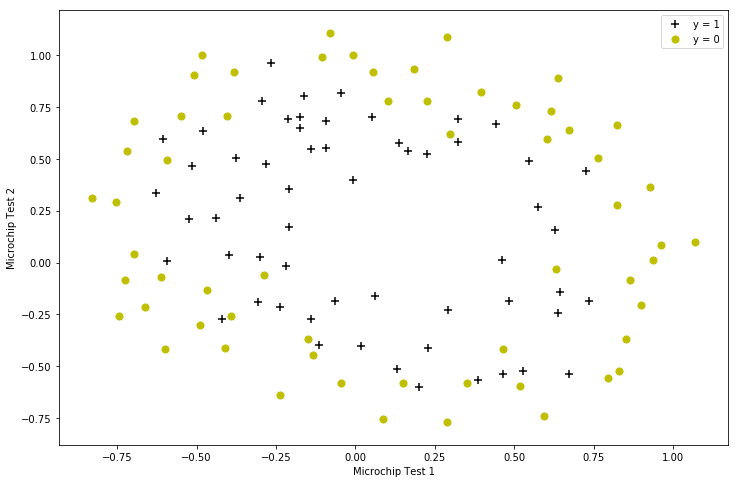

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv("ex2data2.txt", header=None,
                      names=['teste1', 'teste2', 'resultado'])


aprovado = dataset[dataset['resultado'].isin([1])]
rejeitado = dataset[dataset['resultado'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(aprovado['teste1'], aprovado['teste2'],
           s=50, c='k', marker='+', label='y = 1')

ax.scatter(rejeitado['teste1'], rejeitado['teste2'],
           s=50, c='y', marker='o', label='y = 0')
ax.legend()
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
plt.show()

### 4.2 - Mapeamento de características (feature mapping)

In [7]:
import pandas as pd
import numpy as np

def mapFeature(x):

    registros = x.shape[0]

    for i in range(1, 6):
        for j in range(1, 6):
            new_features = np.multiply(x[:, 1] ** i, x[:, 2] ** j)
            new_features = np.reshape(new_features, (registros, 1))
            x = np.concatenate((x, new_features), axis=1)

    return x


dataset = pd.read_csv("ex2data2.txt", header=None,
                      names=['teste1', 'teste2', 'resultado'])
dataset.insert(0, 'Ones', 1)
dataset = np.array(dataset)
cols = dataset.shape[1]
X = dataset[:, 0:cols - 1]


new_x = mapFeature(X)
new_x

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         1.21245165e-07,  8.48182678e-08,  5.93354674e-08],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
        -2.20465113e-06, -1.51005374e-06, -1.03429621e-06],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
        -1.47881251e-04, -1.02370796e-04, -7.08661834e-05],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
        -2.66252288e-02, -2.66057924e-02, -2.65863702e-02],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
        -1.01920483e-11, -1.01846081e-11, -1.01771734e-11],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
        -2.90731893e-06,  8.89988470e-08, -2.72443271e-09]])

### 4.3 - Função de custo e gradiente

In [13]:
import pandas as pd
import numpy as np
import scipy.optimize as opt

def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

def costFunctionReg(theta, X, y, alpha):

    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    reg = (alpha / 2 * len(X)) * np.sum(np.asarray(
        theta[:, 1:theta.shape[1]]) ** 2)

    return np.sum(grad0 - grad1) / (len(X)) + reg

def costFunctionReg(theta, X, y, alpha):

    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    reg = (alpha / 2 * len(X)) * np.sum(np.asarray(
        theta[:, 1:theta.shape[1]]) ** 2)

    return np.sum(grad0 - grad1) / (len(X)) + reg


dataset = pd.read_csv("ex2data2.txt", header=None,
                      names=['teste1', 'teste2', 'resultado'])
dataset.insert(0, 'Ones', 1)
dataset = np.array(dataset)
cols = dataset.shape[1]
X = dataset[:, 0:cols - 1]
y = dataset[:, cols - 1:]


new_x = mapFeature(X)

theta = np.zeros(len(new_x.T))

custo = costFunctionReg(theta, new_x, y, 1)
print("Custo para Lambda = 1: " + str(custo))

custo = costFunctionReg(theta, new_x, y, 0)
print("Custo para Lambda = 0: " + str(custo))

custo = costFunctionReg(theta, new_x, y, 100)
print("Custo para Lambda = 100: " + str(custo))

Custo para Lambda = 1: 0.6931471805599454
Custo para Lambda = 0: 0.6931471805599454
Custo para Lambda = 100: 0.6931471805599454


In [15]:
def gradRegLog(theta, X, y, alpha):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:, i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X))
            + ((alpha / len(X)) * theta[:, i])

    return grad


# Encontrando os valores ótimos de theta através da função optmize do Scipy,
# assim como calculamos para os exercícios da Parte 3
opt_theta = opt.fmin_tnc(func=costFunctionReg, x0=theta,
                         fprime=gradRegLog, args=(new_x, y, 1))
print(opt_theta)

(array([ 4.02746336e-06,  7.74505598e-07,  6.77686008e-06, -5.97366681e-05,
        1.29944304e-05,  2.02021400e-05, -5.55358405e-06,  1.86277964e-05,
        2.39942417e-05, -9.20755135e-05, -1.88595841e-05, -5.15808576e-05,
       -2.67825062e-05,  3.34052933e-05,  1.21150882e-05,  2.87903290e-05,
        9.42426647e-06,  1.70795540e-05, -4.92156536e-06, -4.96692965e-05,
       -9.33245209e-07, -1.43280758e-05, -2.55454019e-06,  2.03819692e-05,
       -4.28572936e-06,  1.52234523e-05,  2.71916269e-06,  7.80025639e-06]), 107, 1)


# T1 - Parte 5

## 5 - Regressão Linear com regularização

### 5.1 - Visualização dos Dados

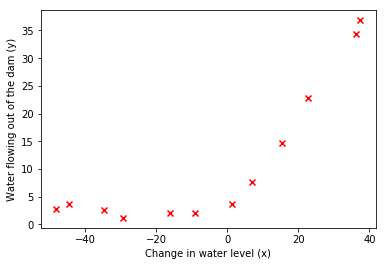

In [9]:
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize


# 5.1 - Visualizacao dos dados
mat = spio.loadmat('ex5data1.mat', squeeze_me=True)

X = mat['X']
y = mat['y']

Xtest = mat['Xtest']
ytest = mat['ytest']

Xval = mat['Xval']
yval = mat['yval']

plt.scatter(X, y, color='red', marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### 5.2 - Função de custo da regressão linear regularizada

In [10]:
# 5.2 - Funcao de custo da regressao linear regularizada

def linearRegCostFunction(theta, X, y, lamb):
    m = len(X)

    custo = ((1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2) +
             (lamb / (2 * m)) * np.sum(theta[1:]) ** 2)

    return custo


X_ones = np.c_[np.ones((X.shape[0], 1)), X]

theta = np.ones(2)
custo = linearRegCostFunction(theta, X_ones, y, 0)
print(custo)

303.9515255535976


### 5.3 - Gradiente na regressão linear regularizada

In [11]:
def linearRegGrad(theta, X, y, lamb):
    m = len(y)

    h = X.dot(theta)

    loss = h - y

    gradient = ((1 / m) * (X.T.dot(loss)) +
                (lamb / m) * theta[1:])

    return gradient

grad = linearRegGrad(theta, X_ones, y, 0)
print(grad)

[-15.30301567 598.16741084]


### 5.4 - Ajustando os parâmetros da regressão linear

[13.08790353  0.36777923]


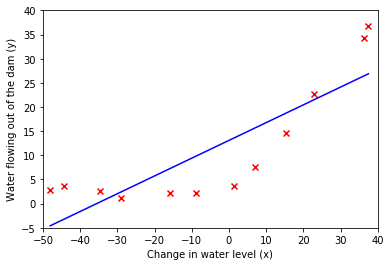

In [12]:
def trainLinearReg(theta, X, y, lamb):
    # initial_theta = np.zeros((X.shape[1],1))
    # initial_theta = np.array([[15], [15]])

    res = minimize(fun=linearRegCostFunction, x0=theta,
                   args=(X, y, lamb), method=None, jac=linearRegGrad,
                   options={'maxiter': 5000})

    return(res.x)

opt_theta = trainLinearReg(theta, X_ones, y, 0)
print(opt_theta)

grad = grad.T
t = np.linspace(X.min(), X.max())
h = np.c_[np.ones(t.shape[0]), t].dot(grad)

plt.scatter(X, y, marker='x', color='red')
# Corrigir para receber os parâmetros de theta otimizados
plt.plot(t, opt_theta[0] + (opt_theta[1] * t), color='blue',
         label='Linear Regression')
plt.axis([-50, 40, -5, 40])
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

# T1 - Parte 6

## 6 - Viés-Variância

### 6.1 - Curvas de aprendizado

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.io as spio


def linearRegCostFunction(theta, X, y, lamb):
    m = len(X)

    custo = ((1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2) +
             (lamb / (2 * m)) * np.sum(theta[1:]) ** 2)

    return custo


def linearRegGrad(theta, X, y, lamb):
    m = len(y)

    h = X.dot(theta)

    loss = h - y

    gradient = ((1 / m) * (X.T.dot(loss)) +
                (lamb / m) * theta[1:])

    return gradient


def trainLinearReg(theta, X, y, lamb):
    # initial_theta = np.zeros((X.shape[1],1))
    # initial_theta = np.array([[15], [15]])

    res = minimize(fun=linearRegCostFunction, x0=theta,
                   args=(X, y, lamb), method=None, jac=linearRegGrad,
                   options={'maxiter': 5000})

    return(res.x)


def learningCurve(X, y, Xval, yval, lamb):
    m = len(y)

    erro_train = np.zeros((m, 1))
    erro_val = np.zeros((m, 1))

    theta = np.zeros(2)

    for i in range(m):
        res = trainLinearReg(theta, X[:i + 1], y[:i + 1], lamb)
        erro_train[i] = linearRegCostFunction(res, X[:i + 1],
                                              y[:i + 1], lamb)
        erro_val[i] = linearRegCostFunction(res, Xval, yval, lamb)

    return(erro_train, erro_val)

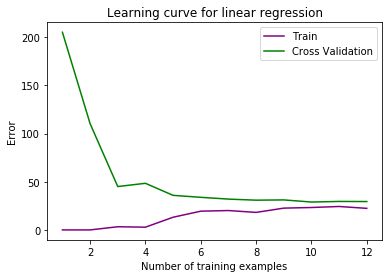

In [3]:
mat = spio.loadmat('ex5data1.mat', squeeze_me=True)

X = mat['X']
y = mat['y']

Xtest = mat['Xtest']
ytest = mat['ytest']

Xval = mat['Xval']
yval = mat['yval']

X_ones = np.c_[np.ones(X.shape[0]), X]
Xval_ones = np.c_[np.ones(Xval.shape[0]), Xval]

erro_treino, erro_validacao = learningCurve(X_ones, y, Xval_ones, yval, 0)

plt.plot(np.arange(1, 13), erro_treino,
         label='Train', color='purple')
plt.plot(np.arange(1, 13), erro_validacao,
         label='Cross Validation', color='green')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()